x	 y(точное)	 y(Рунге–Кутта)	 |Δ|
0.00	 1.100000	 1.100000	 0.000000
0.20	 1.058014	 1.057908	 0.000106
0.40	 1.094366	 1.094152	 0.000213
0.60	 1.192982	 1.192675	 0.000308
0.80	 1.328019	 1.327631	 0.000389

Максимум модуля отклонения = 3.885565e-04


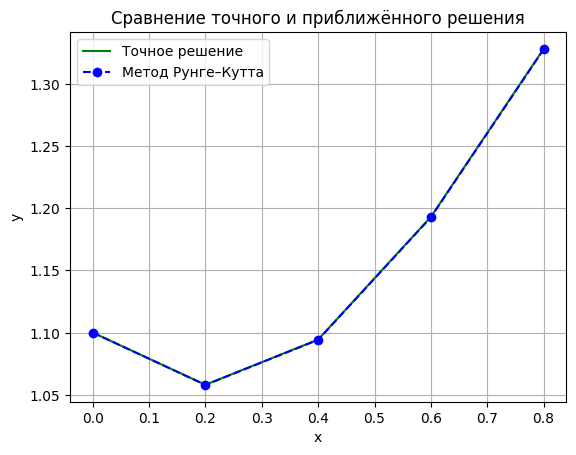

In [1]:
from math import sin, cos, exp, sqrt
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# ==== Исходные данные ====
a, b = 0.0, 0.8
y0 = 1.1
h = 0.2

# ==== Правая часть ===
def f(x, y):
    return y*cos(x) - exp(-2*x)*(2 + 3*cos(x))/(3*y)

# ==== Метод Рунге–Кутты 4-го порядка ====
def rk4(a, b, y0, h):
    x = a
    y = y0
    X = [x]
    Y = [y]
    while x < b - 1e-10:
        k1 = f(x, y)
        k2 = f(x + h/2, y + h*k1/2)
        k3 = f(x + h/2, y + h*k2/2)
        k4 = f(x + h,   y + h*k3)
        y += h*(k1 + 2*k2 + 2*k3 + k4)/6
        x += h
        X.append(round(x, 2))
        Y.append(y)
    return np.array(X), np.array(Y)

# ==== Точное решение через интеграл ====
def y_exact(x):
    integrand = lambda t: exp(-2*t - 2*sin(t)) * (2 + 3*cos(t))
    I, _ = quad(integrand, 0, x)
    return sqrt(exp(2*sin(x)) * (1.21 - (2/3)*I))

# ==== Вычисления ====
X, Y_rk = rk4(a, b, y0, h)
Y_exact = np.array([y_exact(x) for x in X])

# ==== Сравнение ====
diff = np.abs(Y_exact - Y_rk)
max_dev = np.max(diff)

print("x\t y(точное)\t y(Рунге–Кутта)\t |Δ|")
for i in range(len(X)):
    print(f"{X[i]:.2f}\t {Y_exact[i]:.6f}\t {Y_rk[i]:.6f}\t {diff[i]:.6f}")

print(f"\nМаксимум модуля отклонения = {max_dev:.6e}")

# ==== График ====
plt.plot(X, Y_exact, 'g-', label='Точное решение')
plt.plot(X, Y_rk, 'bo--', label='Метод Рунге–Кутта')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение точного и приближённого решения")
plt.legend()
plt.grid(True)
plt.show()